**Importing packages**

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Importing data**

After importing the libraries, we will now load the dataset into a Pandas database

In [24]:
df= pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [25]:
#Dimensions of the database
df.shape

(8807, 12)

**Data cleaning**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [27]:
#Any missing values?
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [28]:
#Dealing with the missing values
df['director'].fillna('No Director', inplace = True)
df['cast'].fillna('No Cast', inplace = True)
df['country'].fillna('Country unavailable', inplace = True)
df['rating'].fillna(method = 'ffill', inplace = True)
df['date_added'].fillna(method = 'ffill', inplace = True)
df['duration'].fillna(method = 'ffill', inplace = True)
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

**Data manipulation**

We separate the data based on their type (Movies/Tv shows)

In [29]:
netflix_TVshow = df[df.type=="TV Show"]
netflix_TVshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [30]:
netflix_movies = df[df.type=="Movie"]
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [31]:
df.loc[5,:]

show_id                                                        s6
type                                                      TV Show
title                                               Midnight Mass
director                                            Mike Flanagan
cast            Kate Siegel, Zach Gilford, Hamish Linklater, H...
country                                       Country unavailable
date_added                                     September 24, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                 1 Season
listed_in                      TV Dramas, TV Horror, TV Mysteries
description     The arrival of a charismatic young priest brin...
Name: 5, dtype: object

In [32]:
df.loc[1:10,'type']

1     TV Show
2     TV Show
3     TV Show
4     TV Show
5     TV Show
6       Movie
7       Movie
8     TV Show
9       Movie
10    TV Show
Name: type, dtype: object

In [33]:
df.iloc[10:15,[1]]

,type
10,TV Show
11,TV Show
12,Movie
13,Movie
14,TV Show


**Data visualization and exploratory analysis**

Number of movies/TV shows

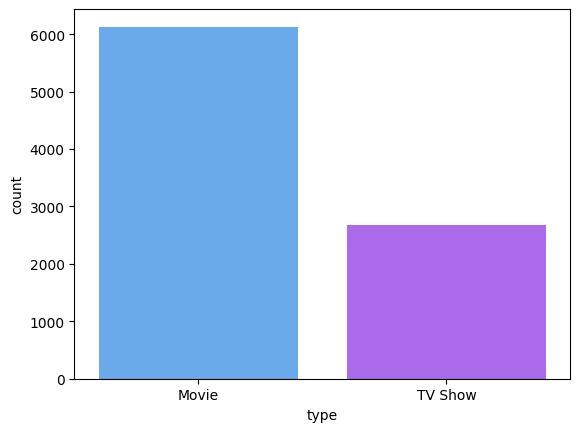

In [34]:
sns.countplot(x='type', data=df,palette = "cool",)
plt.show()

Percentage of movies/TV shows

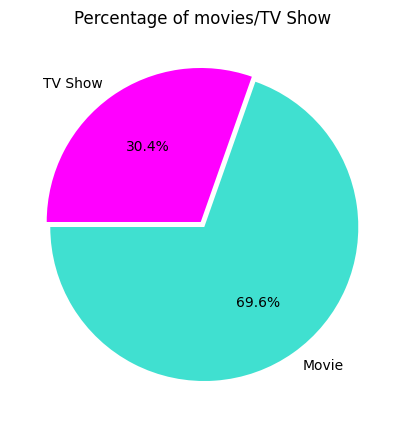

In [35]:
plt.figure(figsize=(10,5))
plt.title("Percentage of movies/TV Show")
plt.pie(df.type.value_counts(),explode=(0.02,0.02),labels=df.type.value_counts().index
        ,colors=['turquoise','magenta'],autopct='%1.1f%%',startangle=180)
plt.show()

Duration of films

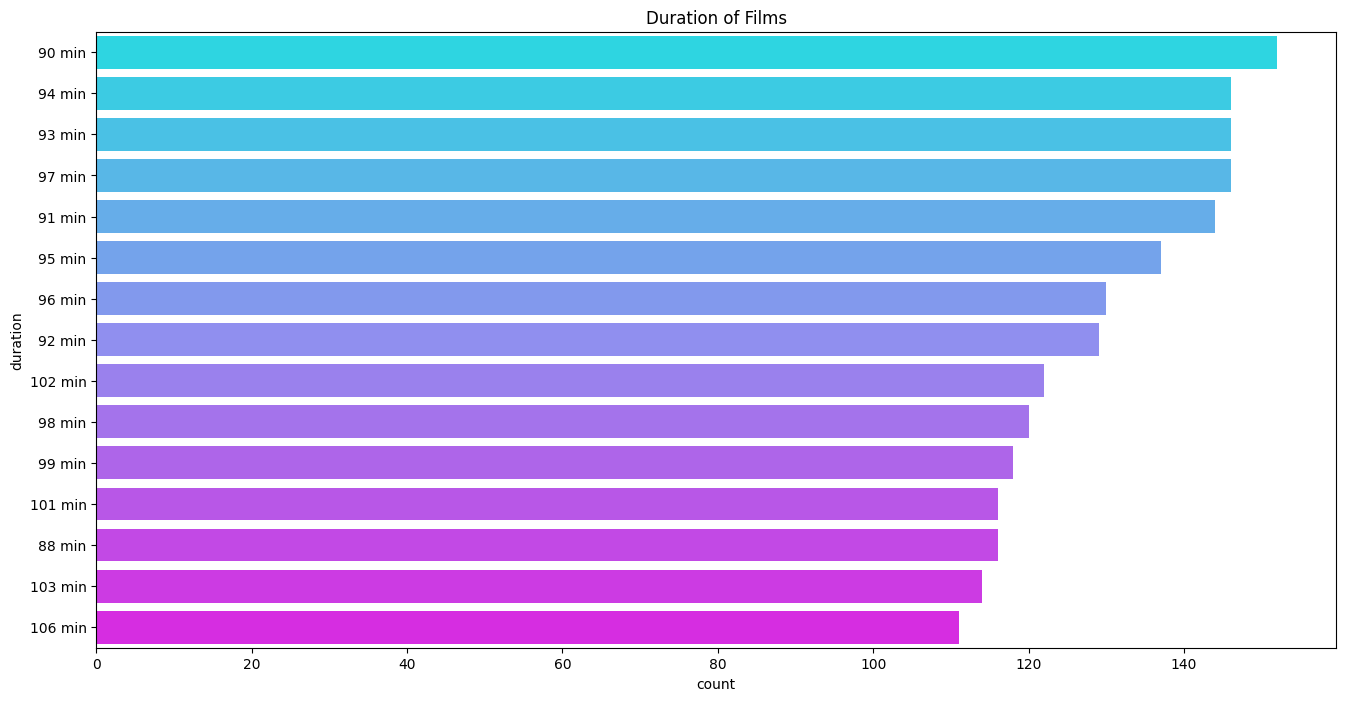

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(y = 'duration', data = netflix_movies,palette='cool', 
              order = netflix_movies['duration'].value_counts()[:15].index)
plt.title('Duration of Films');

Duration of TV shows

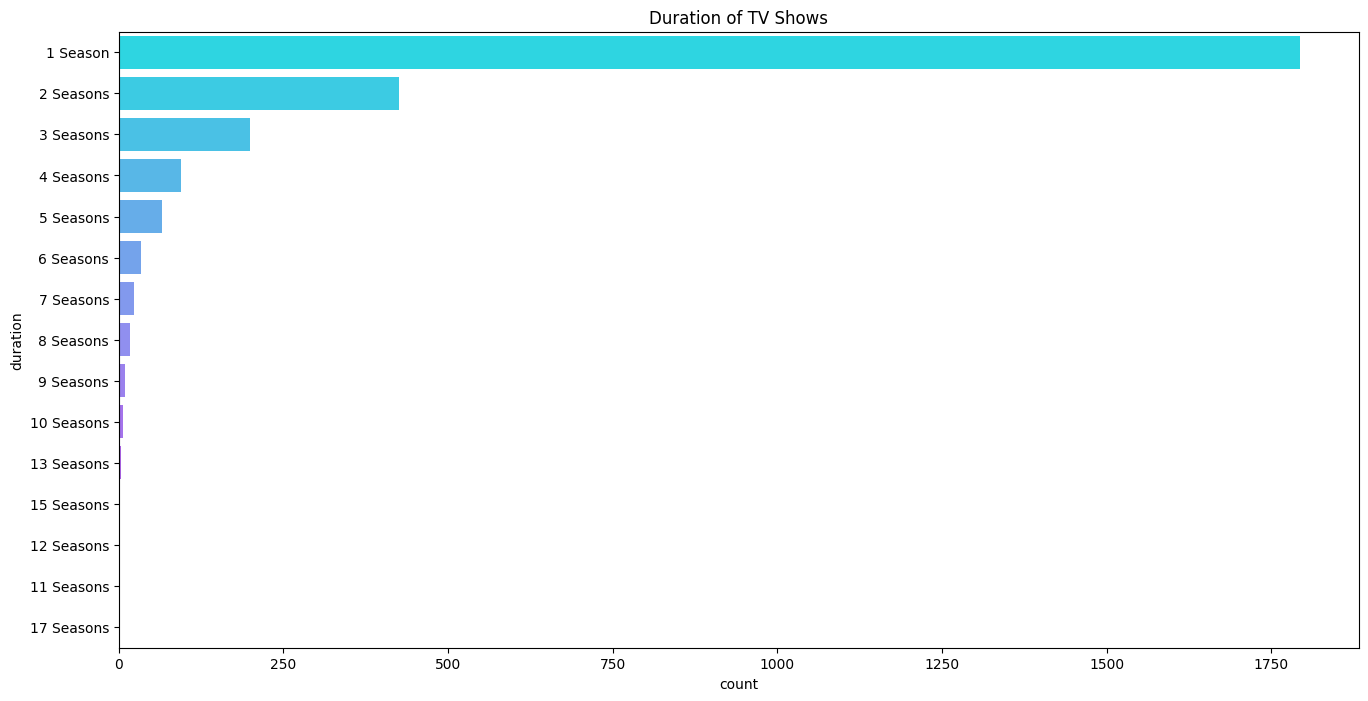

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(y = 'duration', data = netflix_TVshow,palette='cool', 
              order = netflix_TVshow['duration'].value_counts()[:15].index)
plt.title('Duration of TV Shows');

The percentage of TV shows with one season

In [38]:
#The number of TV shows by seasons
netflix_TVshow['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

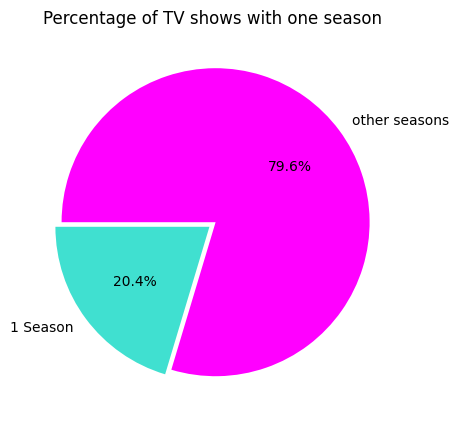

In [39]:
counts = df['duration'].value_counts()
count_1_season = counts["1 Season"]
count_other_seasons = sum(counts) - count_1_season
values = [count_1_season, count_other_seasons]

plt.figure(figsize=(10,5))
plt.title("Percentage of TV shows with one season")
plt.pie(values,
        explode=(0.025,0.025), labels=["1 Season","other seasons"], 
        colors=['Turquoise','magenta'],
        autopct='%1.1f%%', 
        startangle=180)
plt.show()

The year with the most Drama productions

In [40]:
#list of "Dramas"
netflix_Dramas = df.loc[df['listed_in'].str.split(',',expand = True)[0] == "Dramas",:]
netflix_Dramas

pd.crosstab(df['release_year'],netflix_Dramas['listed_in'])
netflix_Dramas_max = netflix_Dramas.groupby('release_year').size().reset_index(name='counts').max()
netflix_Dramas_max

release_year    2021
counts           216
dtype: int64

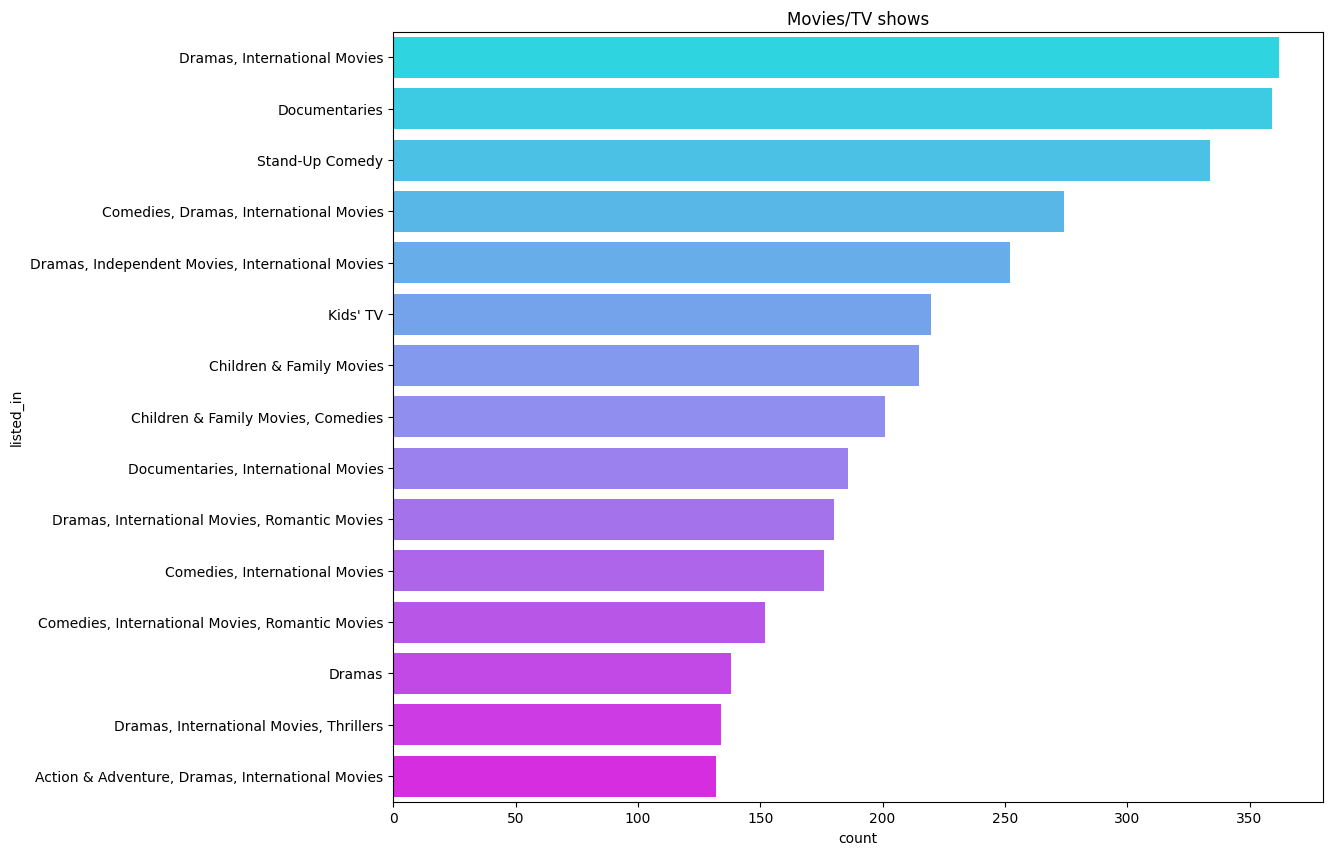

In [41]:
plt.figure(figsize=(12,10))
sns.countplot(y="listed_in", data=df, palette="cool", order=df['listed_in'].value_counts().index[0:15])
plt.title("Movies/TV shows");

Dramas and international films make up the majority of content on Netflix, followed by documentaries, then comedies. The reason could be that most of the viewers are international subscribers.

Top 10 Movies

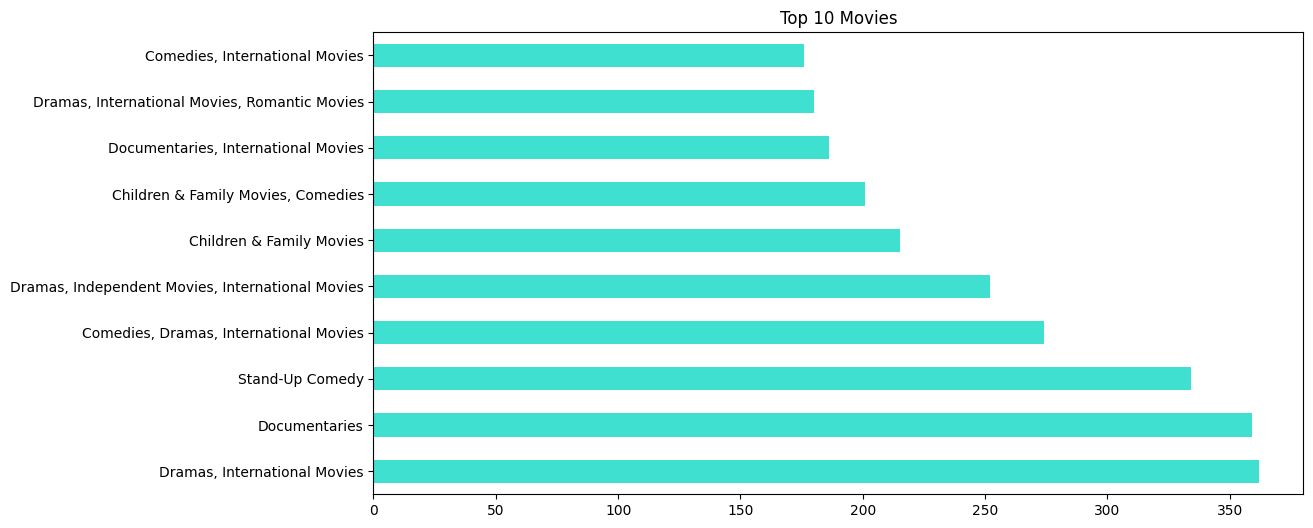

In [42]:
plt.figure(figsize=(12,6))
netflix_movies["listed_in"].value_counts()[:10].plot(kind="barh",color="Turquoise")
plt.title("Top 10 Movies");

Top 10 TV shows

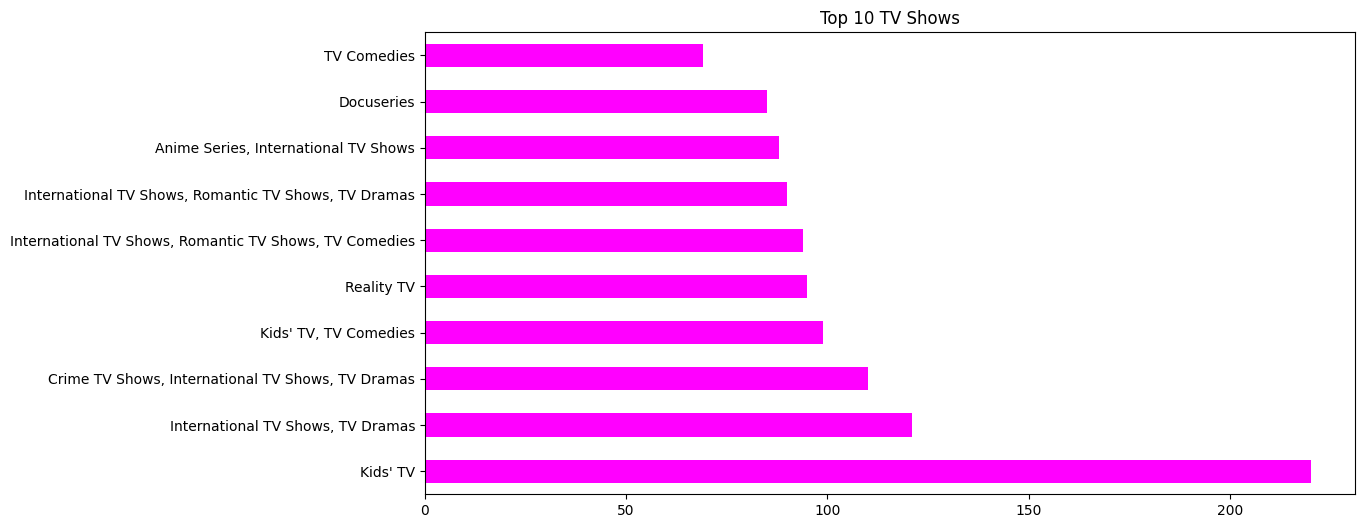

In [43]:
plt.figure(figsize=(12,6))
netflix_TVshow["listed_in"].value_counts()[:10].plot(kind="barh",color="magenta")
plt.title("Top 10 TV Shows");

Ratings

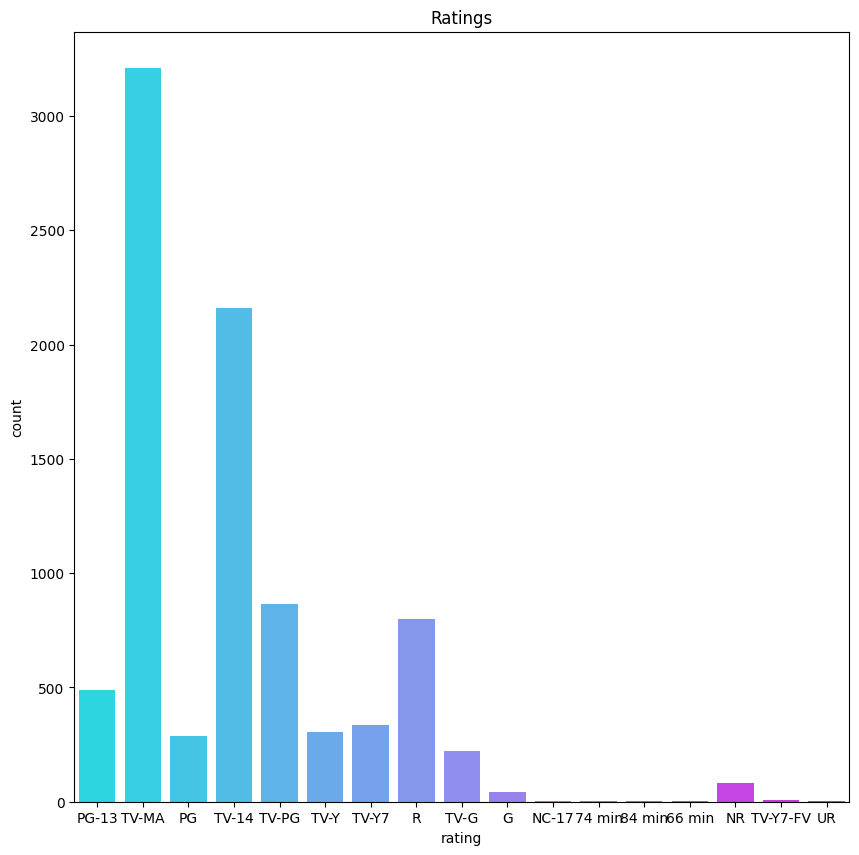

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(x='rating',data=df,palette='cool')
plt.title("Ratings");

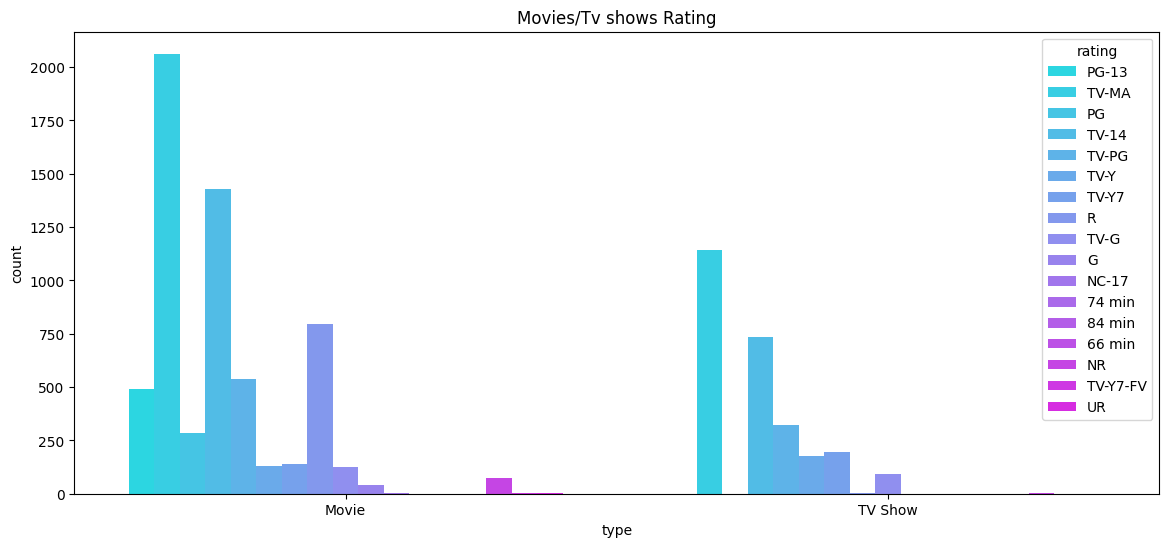

In [45]:
plt.figure(figsize=(14,6))
sns.countplot(x='type',hue='rating',data=df,palette='cool')
plt.title("Movies/Tv shows Rating");

Top 10 countries with maximum content creation

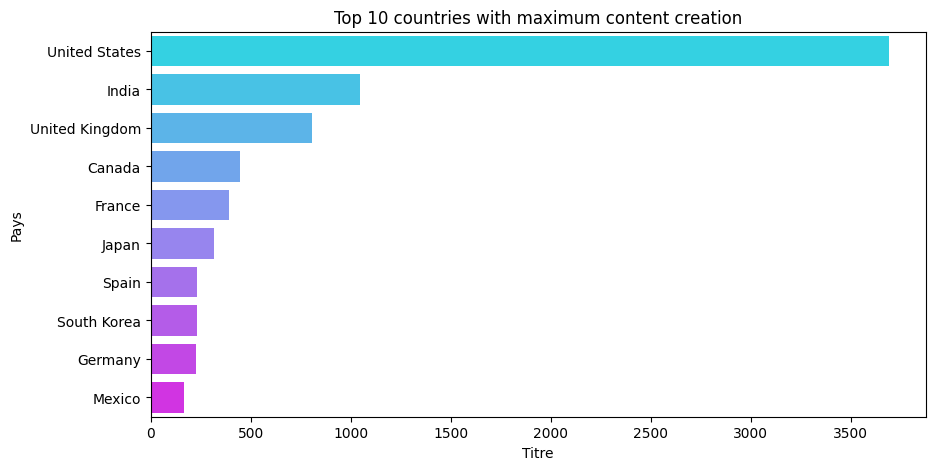

In [58]:
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country unavailable']
plt.figure(figsize=(10,5))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10],palette='cool')
plt.title('Top 10 countries with maximum content creation')
plt.xlabel('Titre')
plt.ylabel('Pays')
plt.show()

The United States represents the majority of content created on Netflix, with nearly 3500 titles. The Indian content comes in second place due to the popularity of Bollywood productions

The type of content produced by country

In [65]:
df_country = df.groupby(['country']).count()['show_id'].to_frame().reset_index()
df_country = df_country.sort_values('show_id',ascending=False)
df_country = df_country.head(5).reset_index(drop=True)
liste = df_country['country']
d= df[df['country'].isin(liste)]
year_wsh = d.groupby(['country','type']).count()['show_id'].to_frame().reset_index()
year_wsh = year_wsh.sort_values(by = 'show_id', ascending= False)

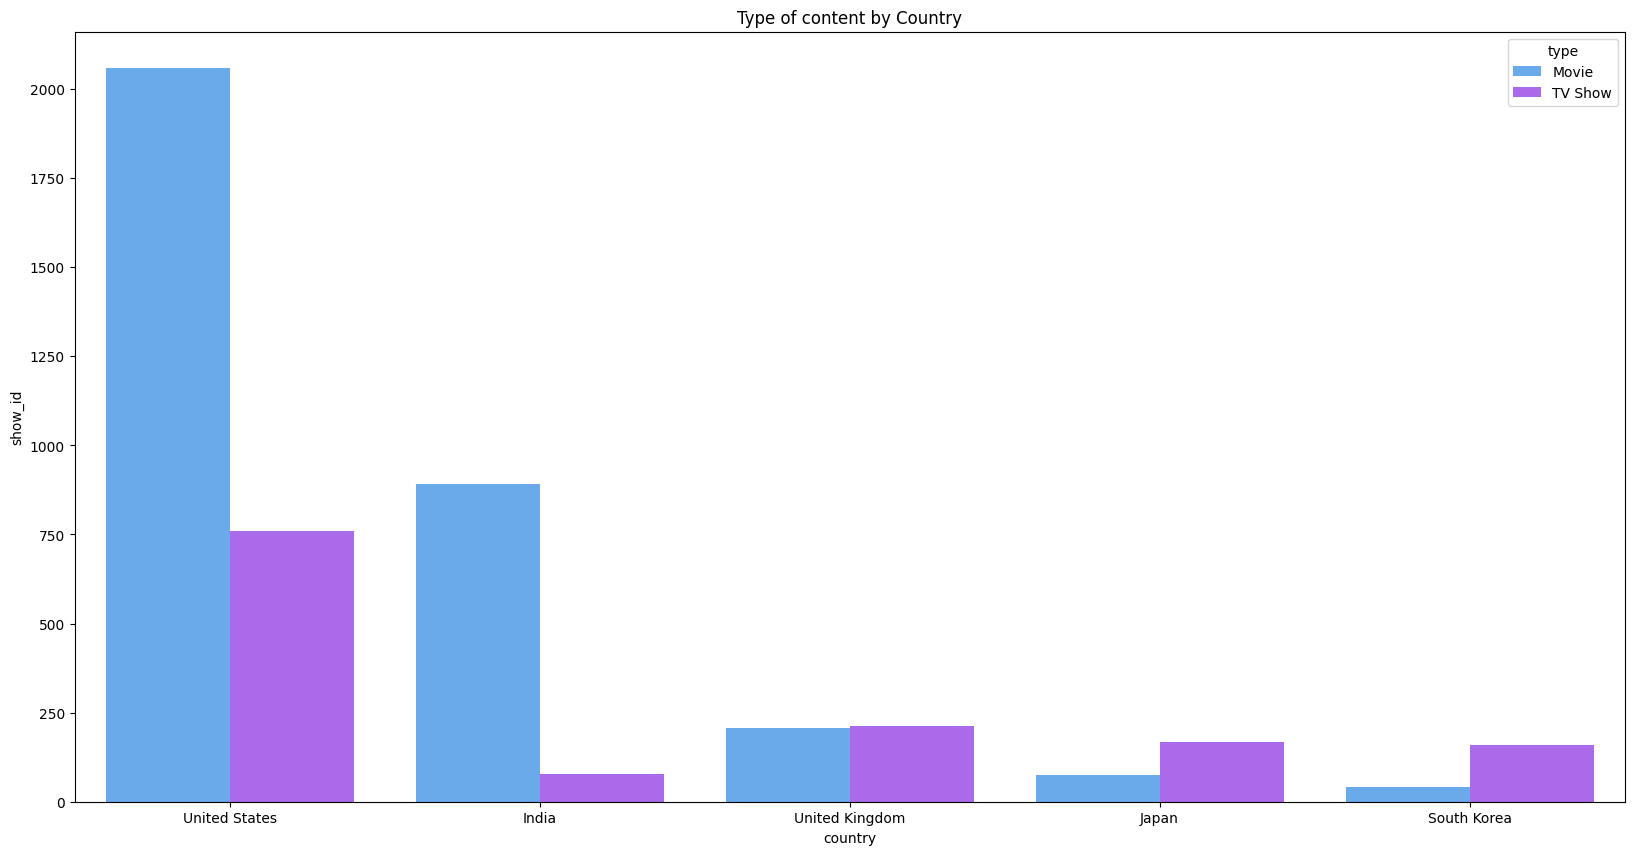

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x="country", y="show_id", hue="type",data= year_wsh,palette='cool')
plt.title('Type of content by Country')
plt.show()

The number of shows released per year

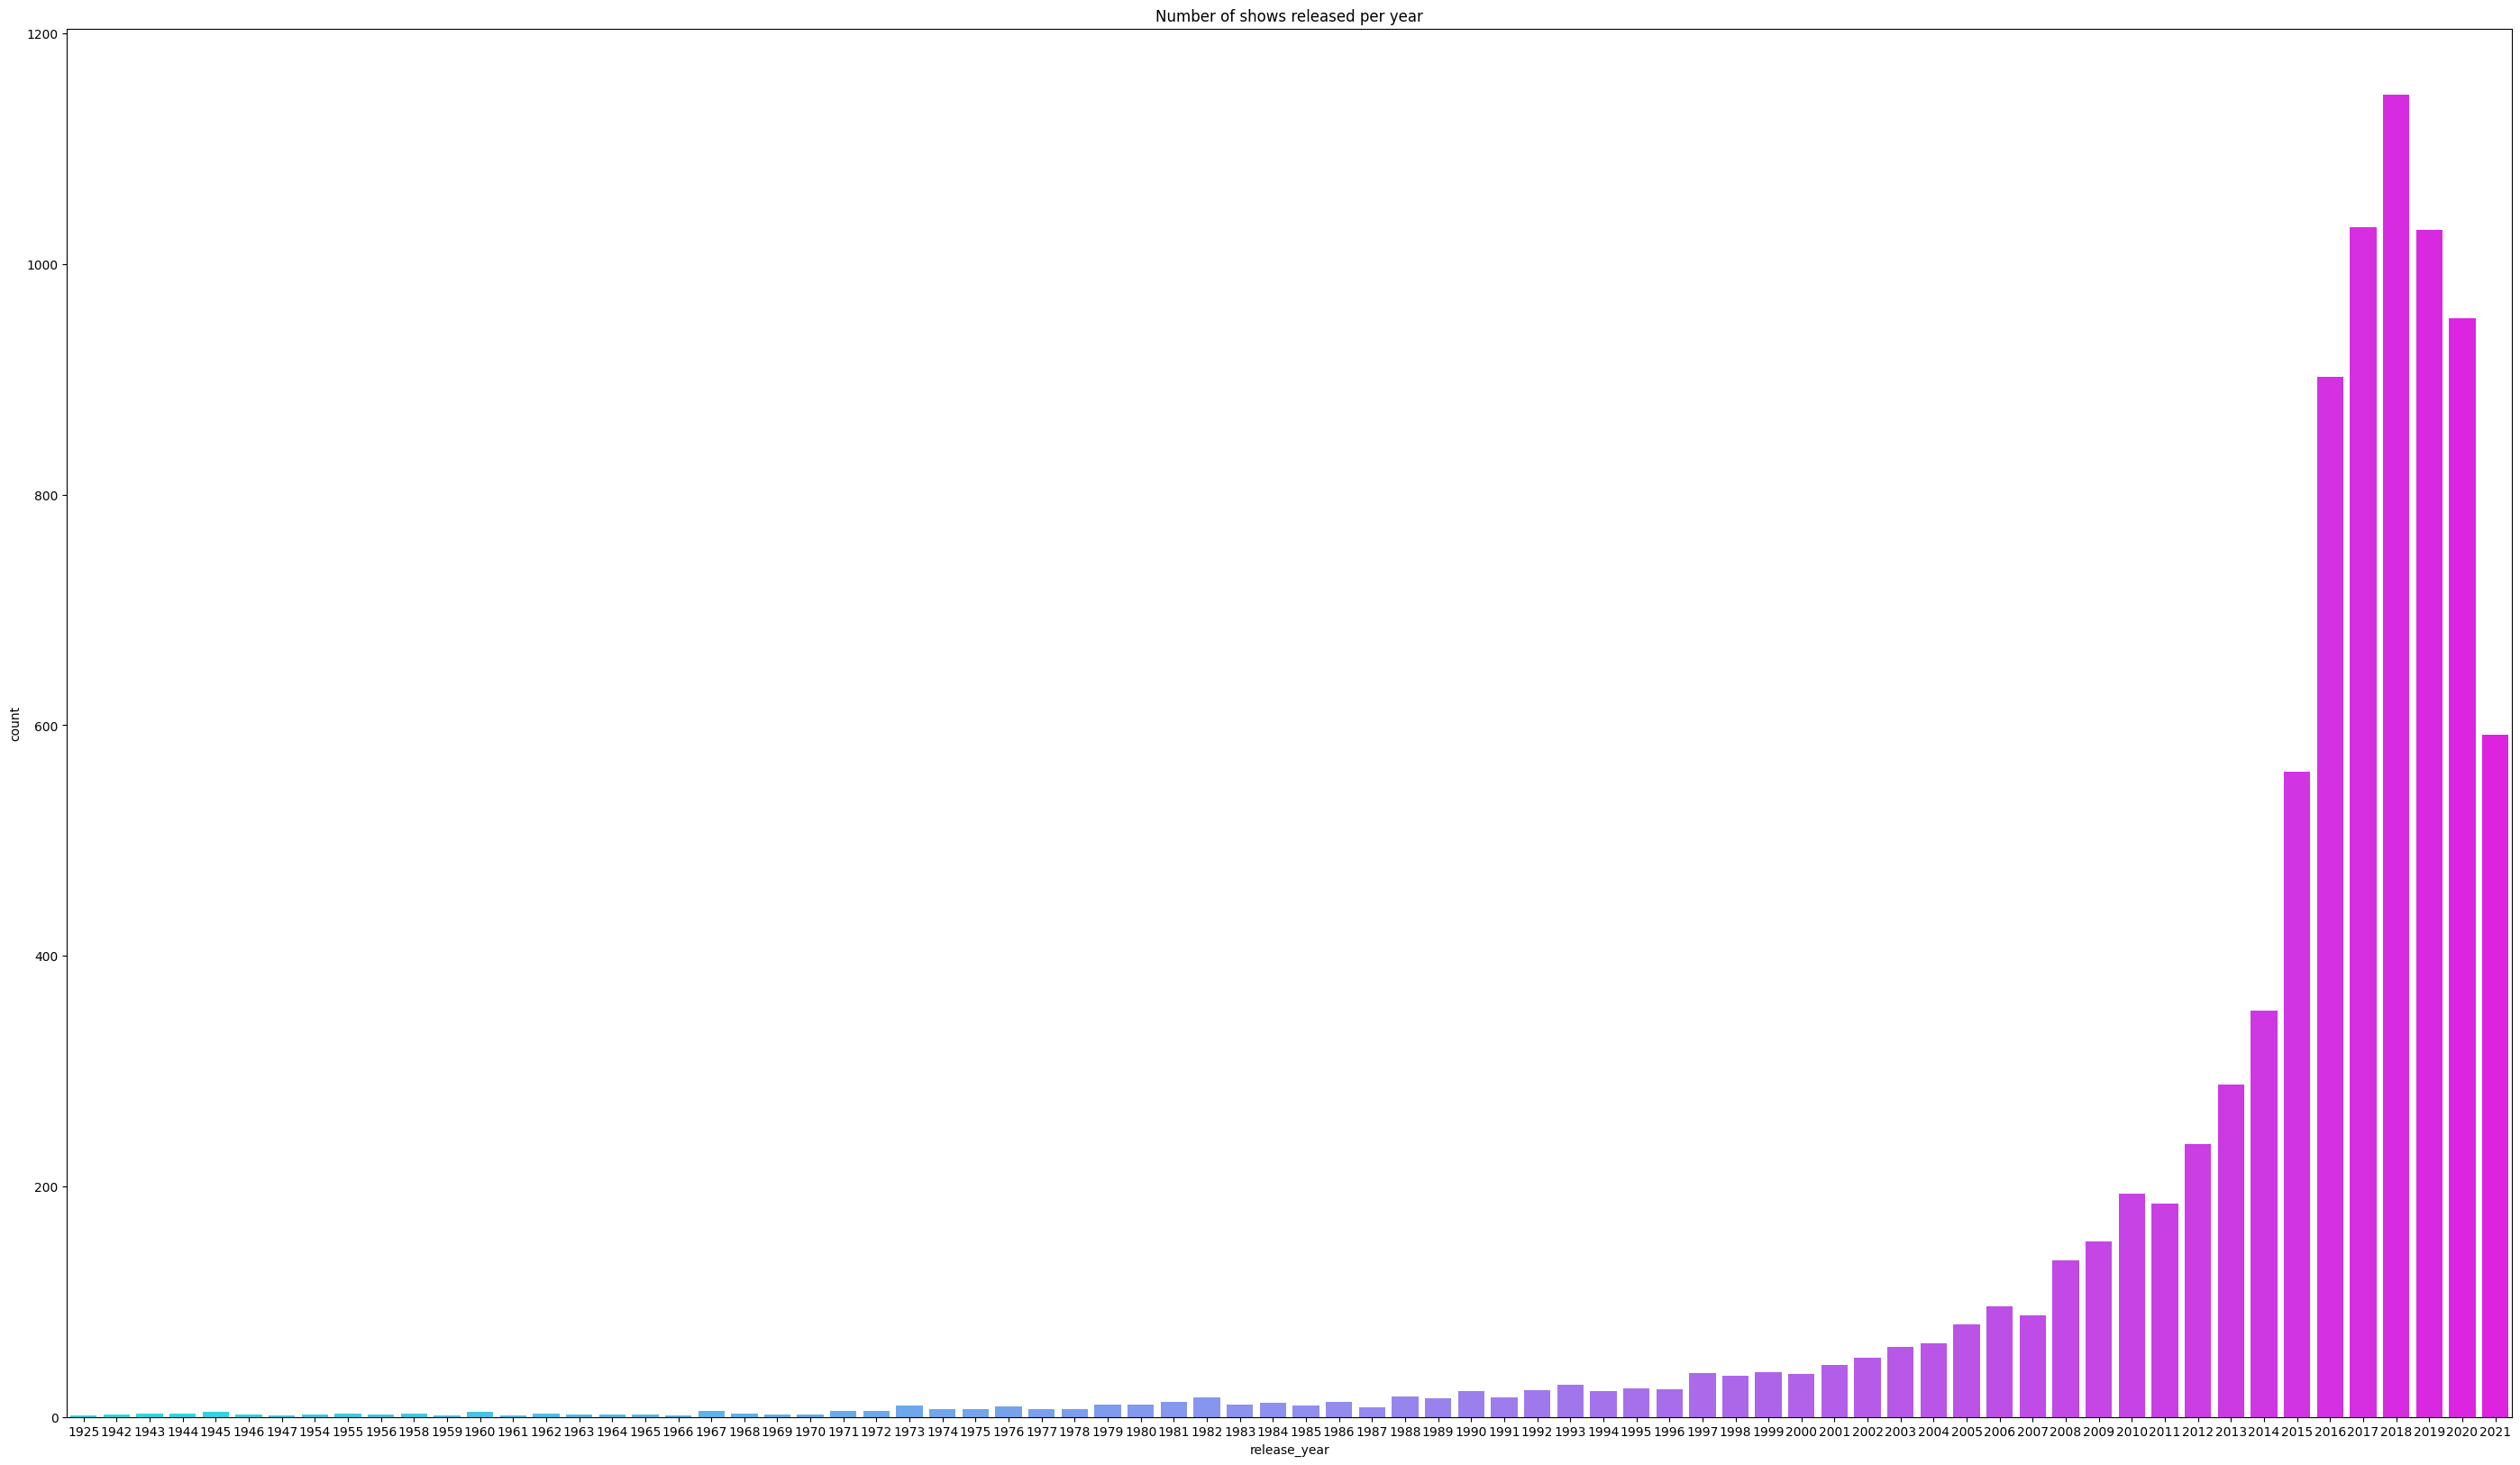

In [50]:
plt.figure(figsize=(35,20))
sns.countplot(x='release_year', data=df, palette='cool')
plt.title("Number of shows released per year");

Movies/TV shows released per year

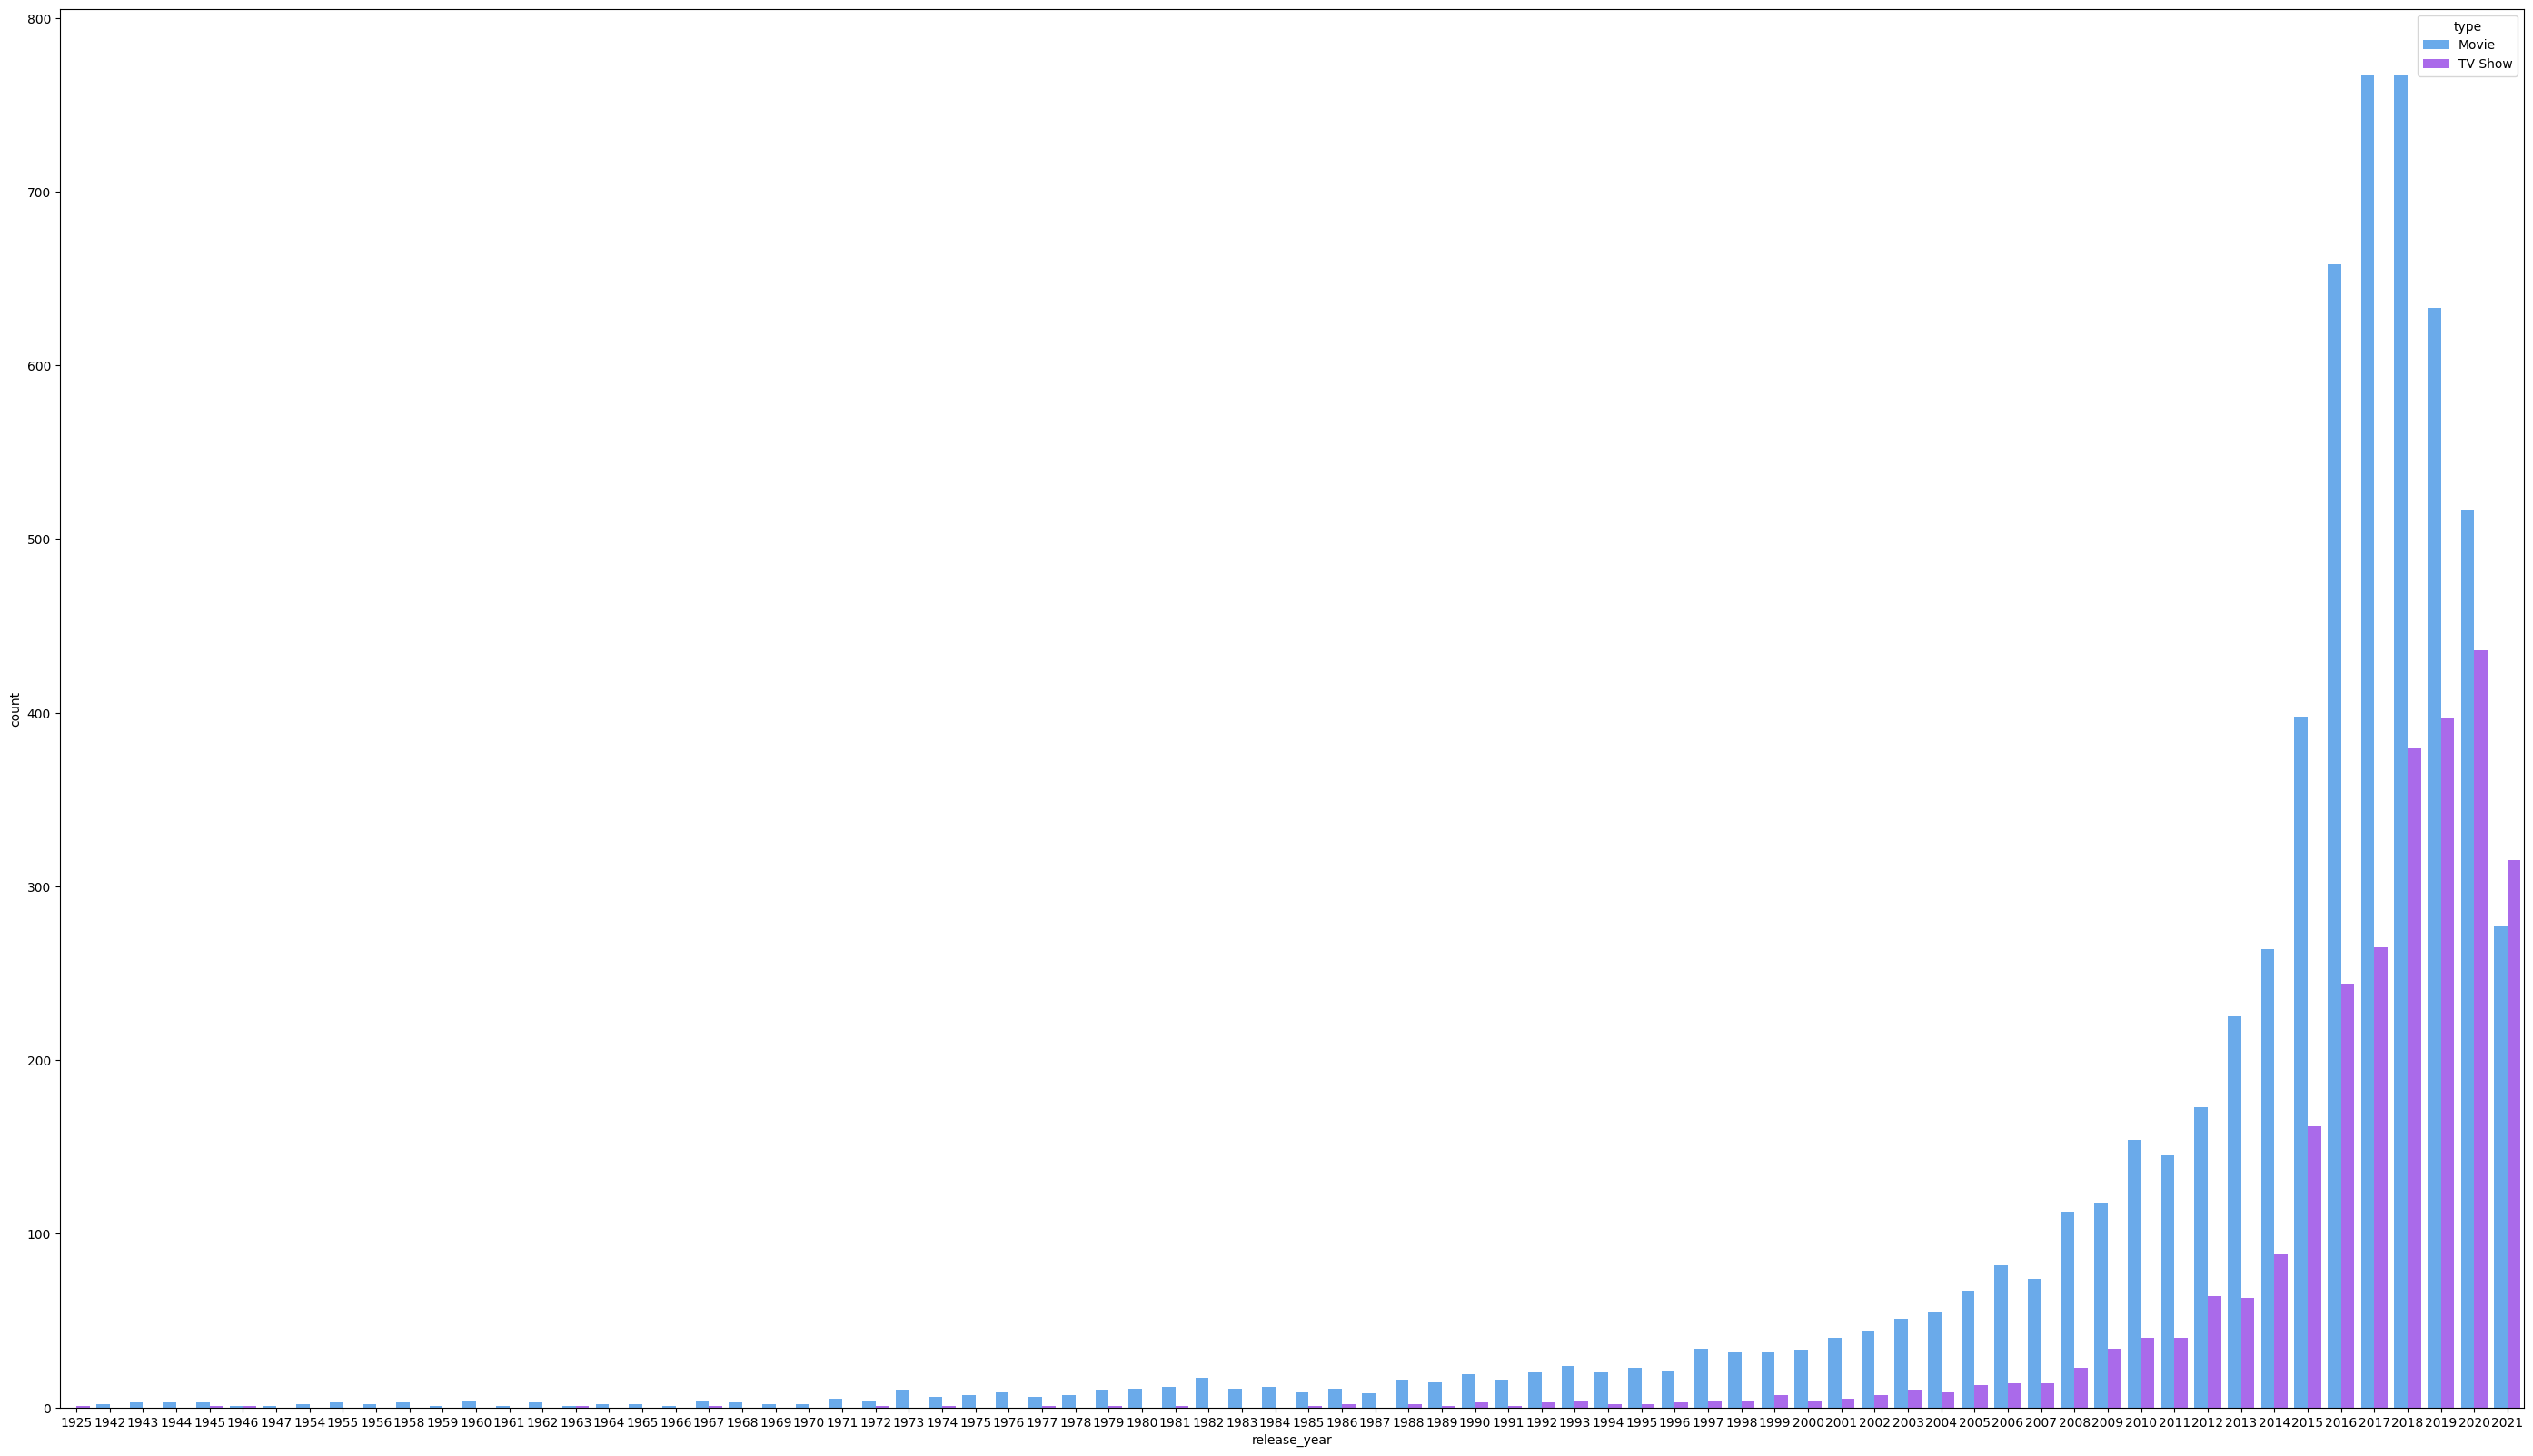

In [51]:
plt.figure(figsize=(35,20)) 
sns.countplot(data=df,x='release_year',hue='type',palette = "cool")
plt.show()